#Devices Price Classification System

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
data = pd.read_csv("train - train.csv")
test_data = pd.read_csv("test - test.csv")

## Data inspection

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [4]:
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [5]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc               float64
four_g           float64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h             float64
sc_w             float64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
#Check for missing data
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
#Check for duplicate data
data.duplicated().sum()

0

In [8]:
#Get info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
#Describe dataset
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


##Data Preprocessing and Preparing

Text(0.5, 1.0, 'Correlation of Attirubtues')

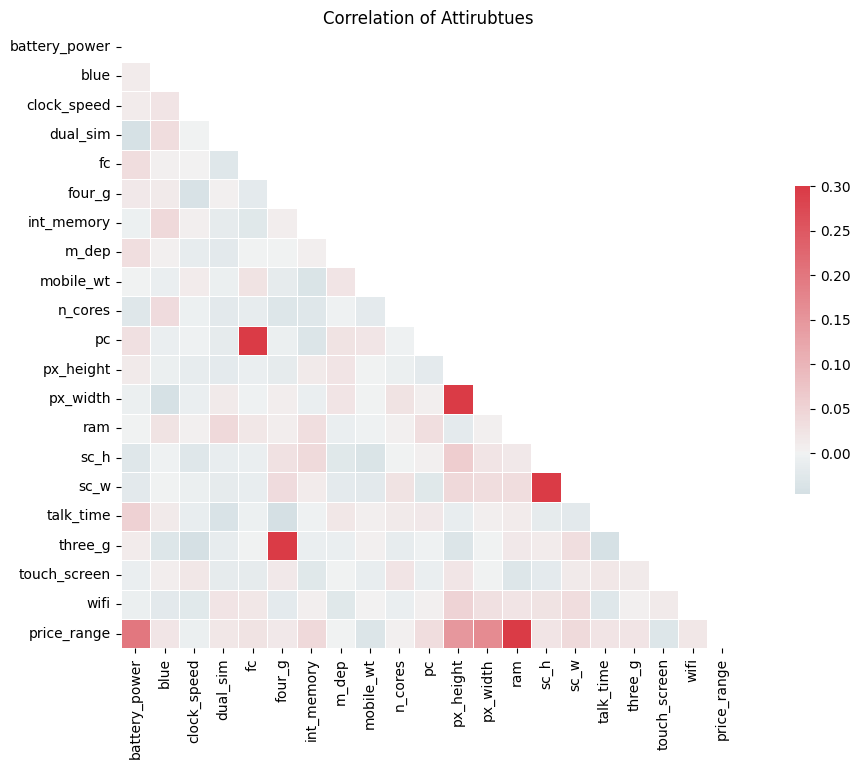

In [10]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation of Attirubtues")

**Here, we can see that the following have high correlation with each other**
1. pc and fc
2. three_g and four_g
3. px_width and px_height
4. ram and prive_range
5. sc_h and sc_w

<Axes: xlabel='talk_time'>

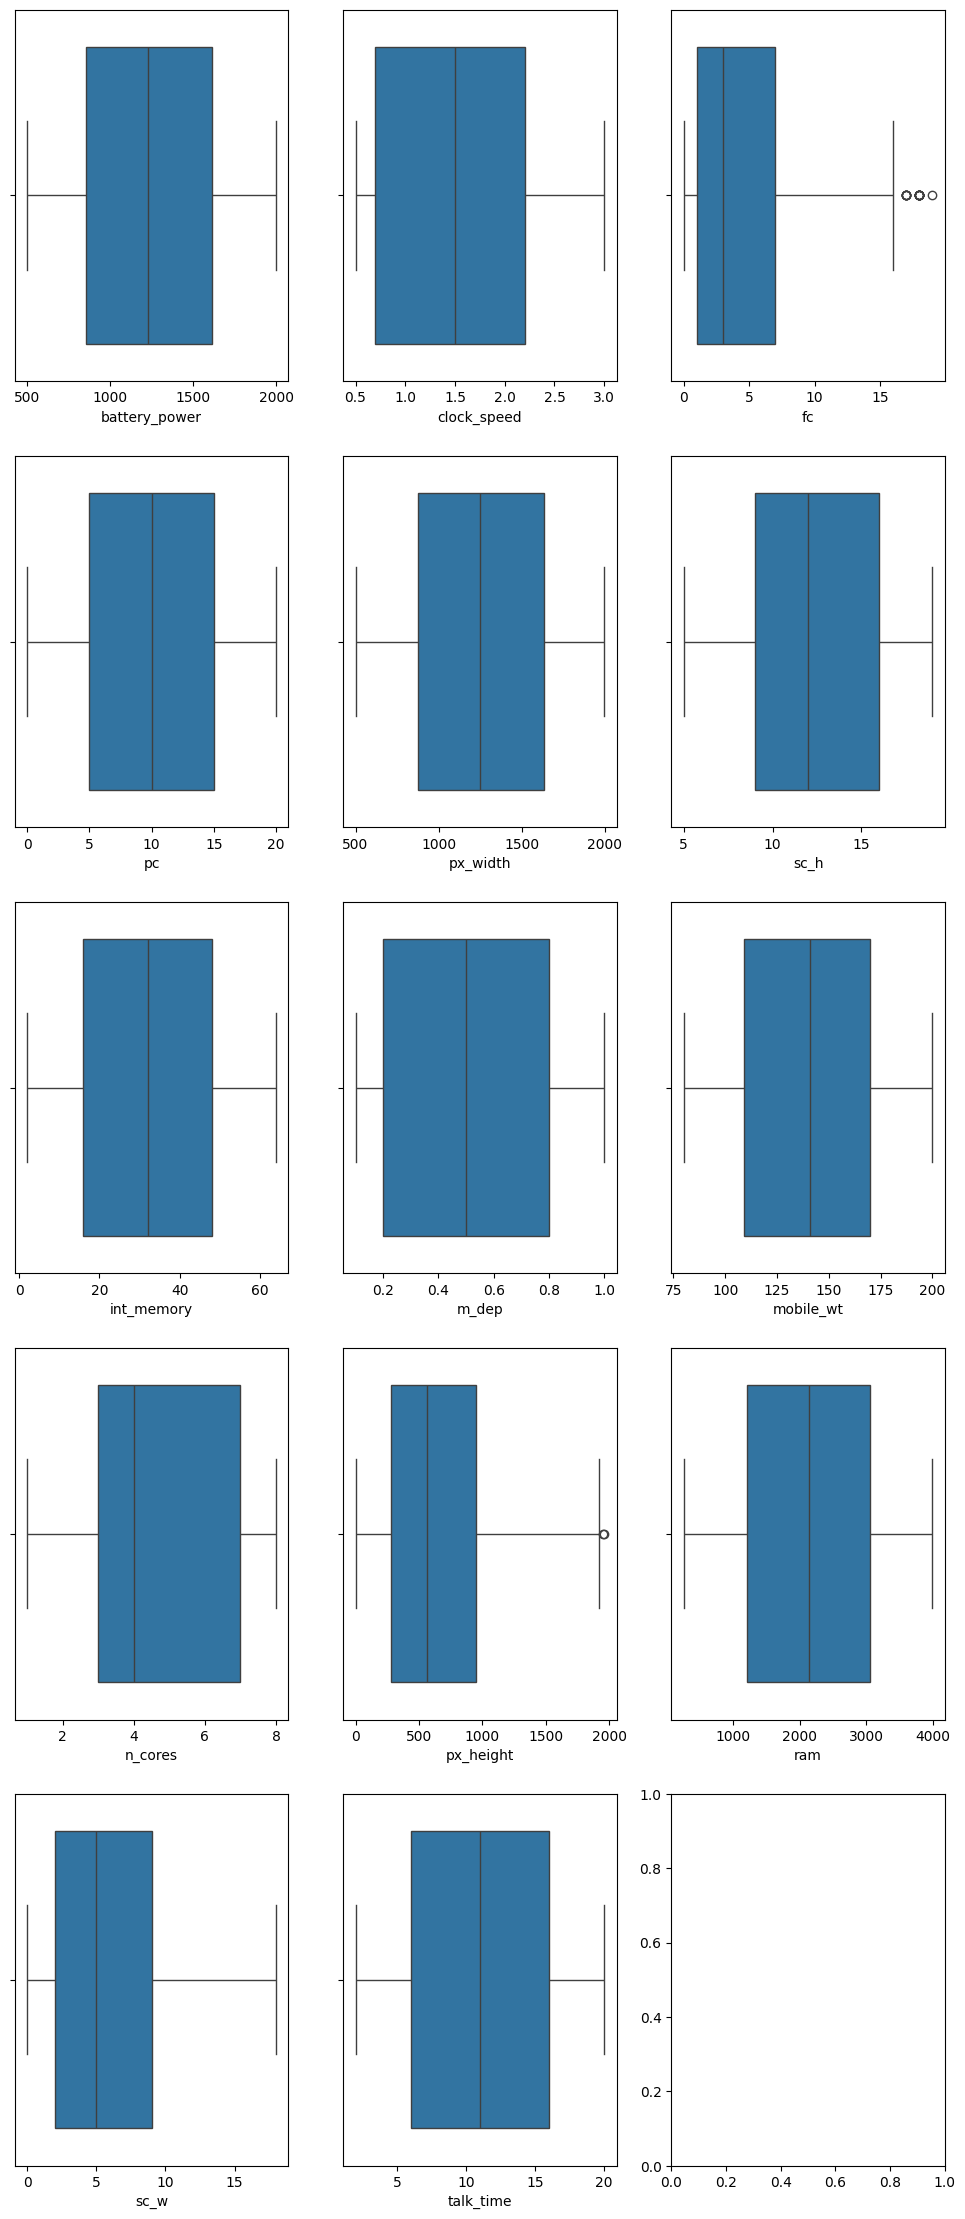

In [11]:
# Outlier Analysis of Non-Categorical Data
fig, ax = plt.subplots(ncols=3, nrows=5, figsize=(12,28))
sns.boxplot(x=data['battery_power'],ax=ax[0, 0])
sns.boxplot(x=data['clock_speed'],ax=ax[0, 1])
sns.boxplot(x=data['fc'],ax=ax[0, 2])
sns.boxplot(x=data['pc'],ax=ax[1, 0])
sns.boxplot(x=data['px_width'],ax=ax[1, 1])
sns.boxplot(x=data['sc_h'],ax=ax[1, 2])
sns.boxplot(x=data['int_memory'],ax=ax[2, 0])
sns.boxplot(x=data['m_dep'],ax=ax[2, 1])
sns.boxplot(x=data['mobile_wt'],ax=ax[2, 2])
sns.boxplot(x=data['n_cores'],ax=ax[3, 0])
sns.boxplot(x=data['px_height'],ax=ax[3, 1])
sns.boxplot(x=data['ram'],ax=ax[3, 2])
sns.boxplot(x=data['sc_w'],ax=ax[4, 0])
sns.boxplot(x=data['talk_time'],ax=ax[4, 1])

**There are a few outliers in fc and px_height only.**

Text(0.5, 1.0, 'Correlation between Attributes and Price Range')

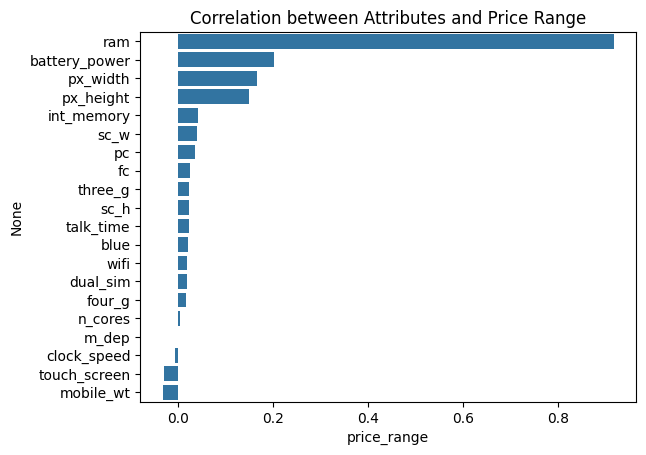

In [12]:
#Correlation between Attributes and Price Range
corr = data.corr()
corr = corr.price_range
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr, y=cr.index)
plt.title("Correlation between Attributes and Price Range")

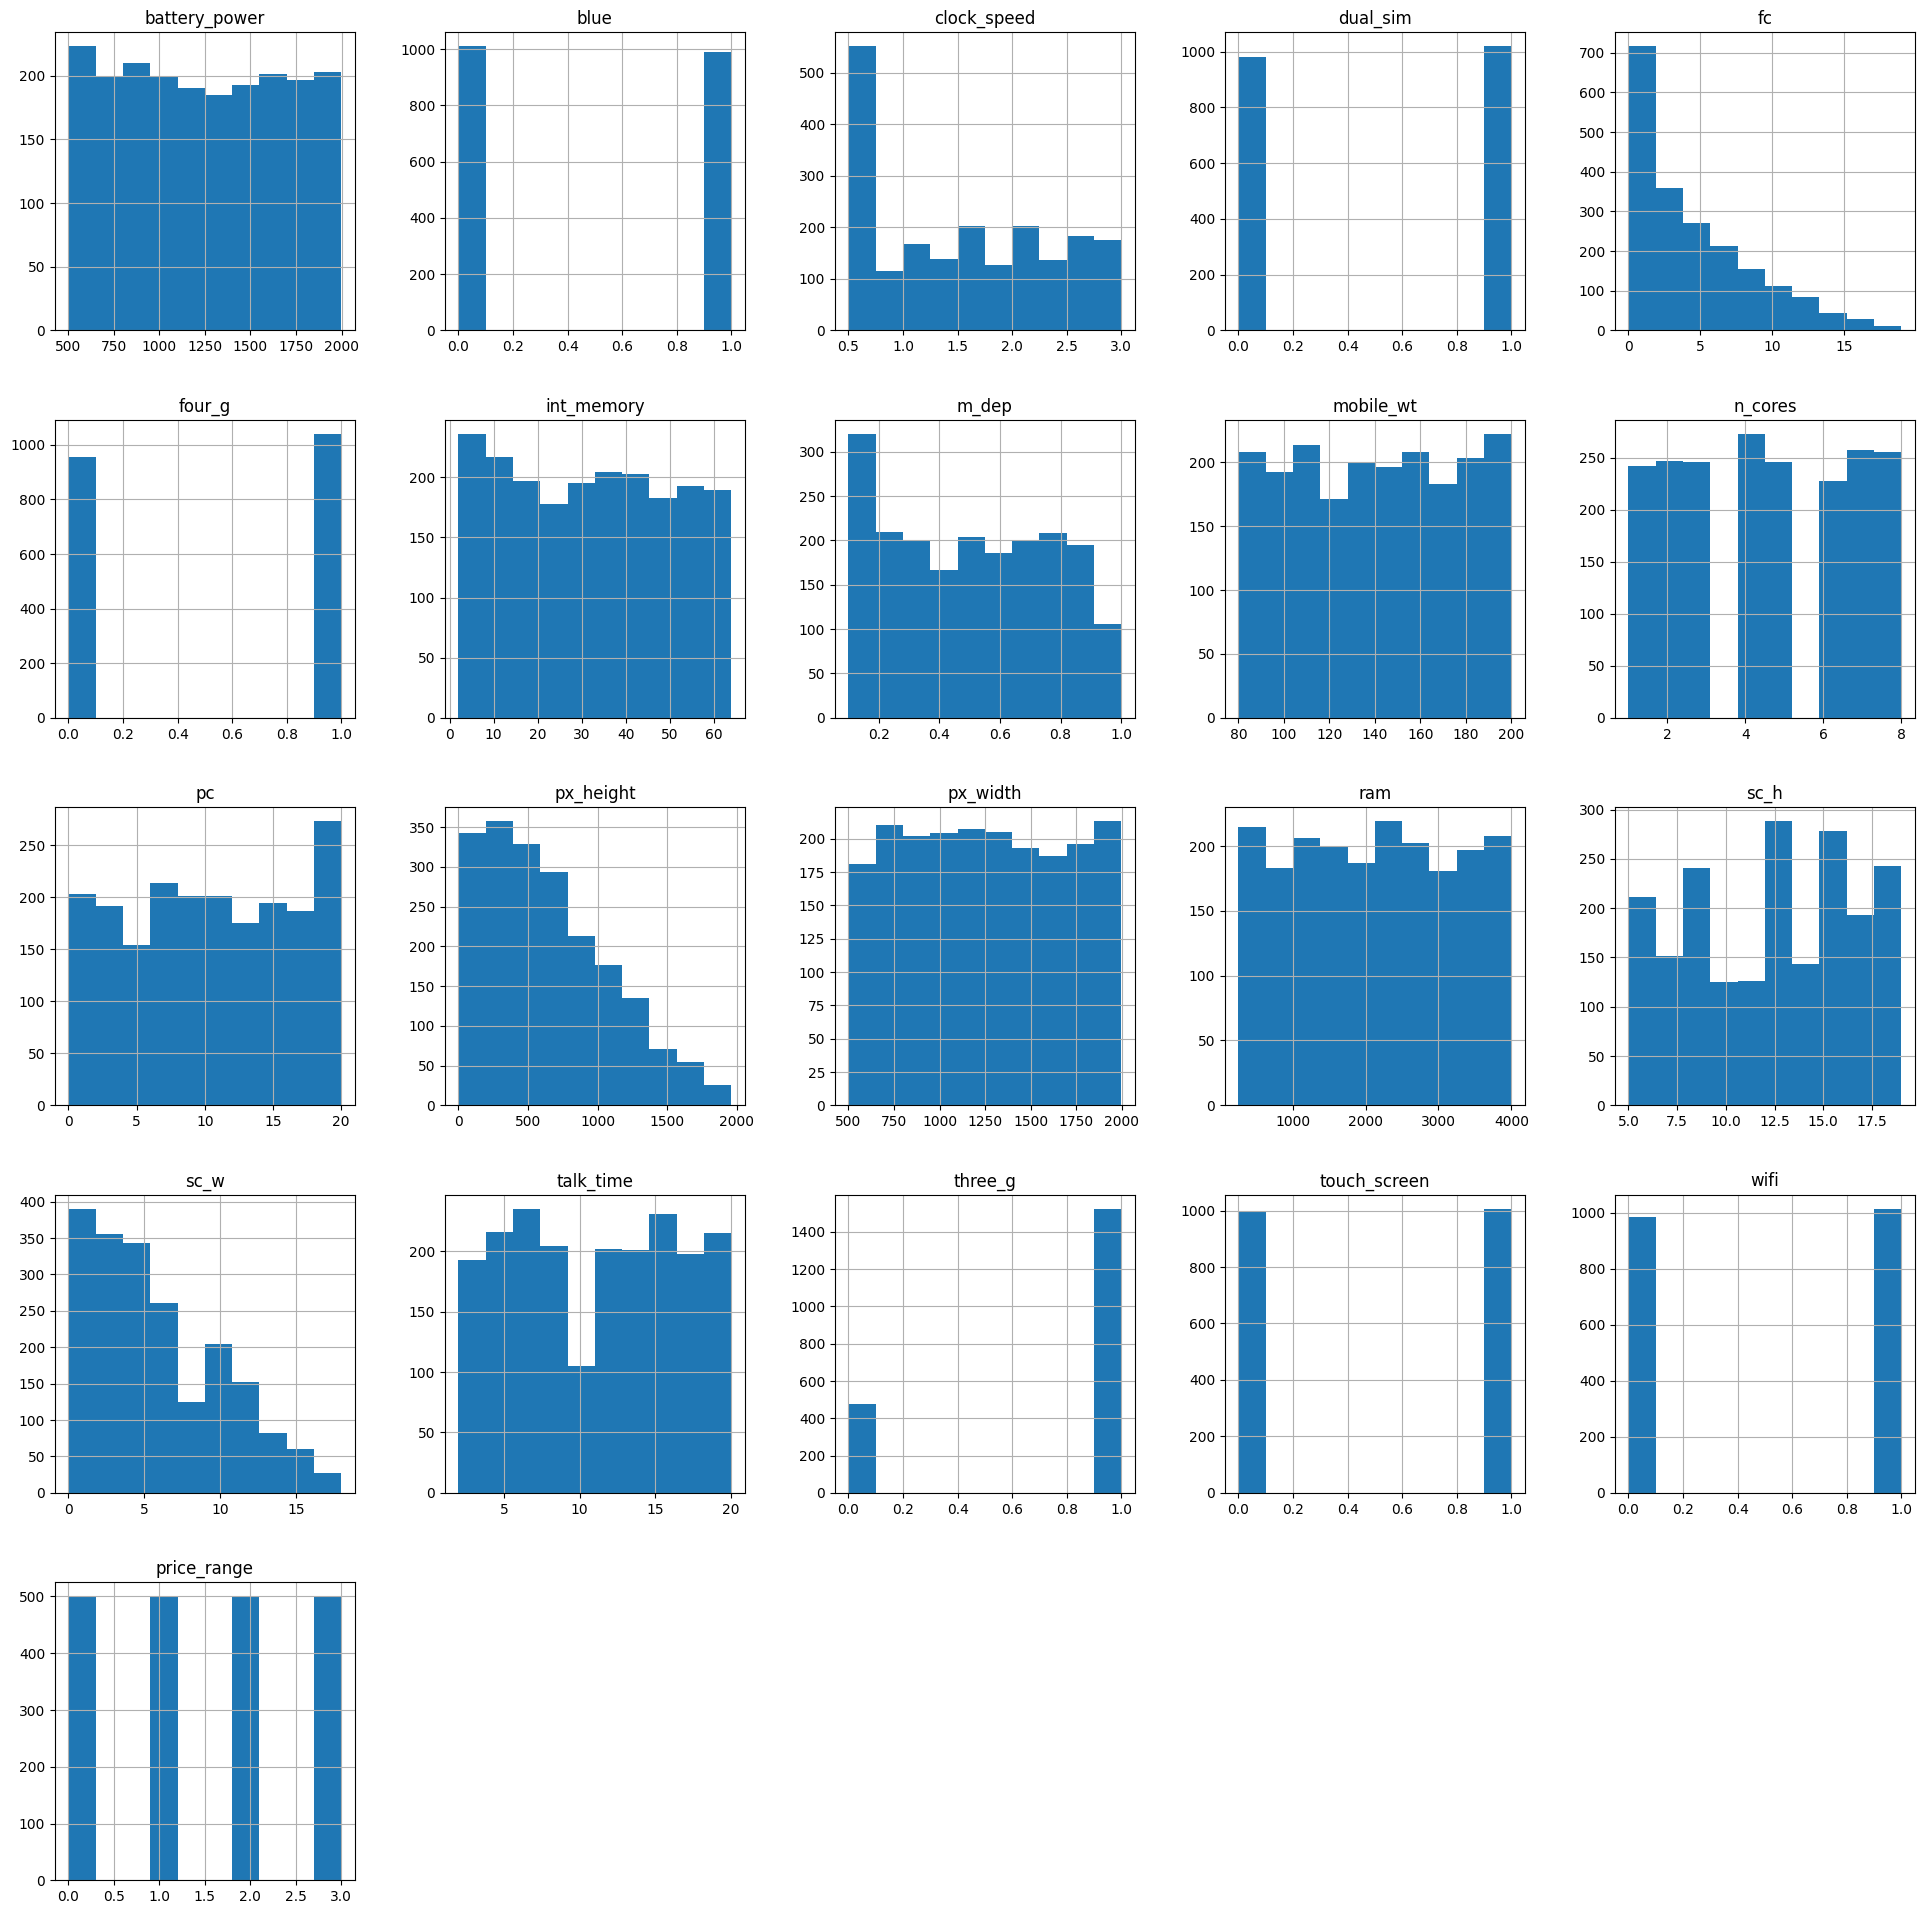

In [13]:
# Plot histograms
data.hist(sharex=False, sharey=False, figsize=(24,24) )
plt.show()

##Prepare the data for classification

In [14]:
#Splitting data to training and validation dataset
from sklearn.model_selection import train_test_split

x = data.drop('price_range', axis=1)
y = data['price_range']
# Splitting of data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

In [16]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col = data.iloc[:,:20].columns
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [21]:
#Impute missing values
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
x_train_imputed = imputer.fit_transform(x_train)

# Fit and transform the imputer on your test data
x_test_imputed = imputer.fit_transform(x_test)

##Implementation of Machine Learning Alogorithms

**In order to predict the price of a mobile phone, we will be using the following algorithms on both the training and validation datasets. Once we have applied these algorithms, we will select the best model for our dataset and create target values for the test dataset.**
1. Logistic regression
2. KNeighbors Classifier
3. SVC
4. Decision Tree Classifier
5. AdaBoost Classifier
6. Gradient Boosting Classifier
7. XGB Classifier

###1. Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression(penalty='l2', C=0.1)
lr.fit(x_train_imputed, y_train)

y_test_pred = lr.predict(x_test_imputed)
y_train_pred = lr.predict(x_train_imputed)

lr_acc=accuracy_score(y_test_pred, y_test)

print("Train Set Accuracy:"+ str(accuracy_score(y_train_pred, y_train)*100))
print("Test Set Accuracy:"+ str(accuracy_score(y_test_pred, y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred, y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred, y_test))

Train Set Accuracy:95.25
Test Set Accuracy:92.5

Confusion Matrix:
[[95  7  0  0]
 [ 5 87  6  0]
 [ 0  6 89  1]
 [ 0  0  5 99]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       102
           1       0.87      0.89      0.88        98
           2       0.89      0.93      0.91        96
           3       0.99      0.95      0.97       104

    accuracy                           0.93       400
   macro avg       0.93      0.92      0.92       400
weighted avg       0.93      0.93      0.93       400



###2. KNeighbors Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train_imputed, y_train)

y_test_pred1 = knn.predict(x_test_imputed)
y_train_pred1=knn.predict(x_train_imputed)

knn_acc=accuracy_score(y_test_pred1, y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred1, y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred1, y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred1, y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1, y_test))

Train Set Accuracy:68.6875
Test Set Accuracy:53.5

Confusion Matrix:
[[77 42  6  0]
 [21 35 37 10]
 [ 1 20 46 34]
 [ 1  3 11 56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.62      0.68       125
           1       0.35      0.34      0.34       103
           2       0.46      0.46      0.46       101
           3       0.56      0.79      0.65        71

    accuracy                           0.54       400
   macro avg       0.54      0.55      0.54       400
weighted avg       0.55      0.54      0.53       400



###3. SVC

In [34]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train_imputed, y_train)

y_test_pred2 = svc.predict(x_test_imputed)
y_train_pred2=svc.predict(x_train_imputed)

svc_acc=accuracy_score(y_test_pred2,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred2,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred2,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred2,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred2,y_test))

Train Set Accuracy:98.0625
Test Set Accuracy:89.5

Confusion Matrix:
[[92  7  0  0]
 [ 8 85  7  0]
 [ 0  8 89  8]
 [ 0  0  4 92]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        99
           1       0.85      0.85      0.85       100
           2       0.89      0.85      0.87       105
           3       0.92      0.96      0.94        96

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.89      0.90      0.89       400



###4. Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train_imputed, y_train)

y_test_pred3 = dtc.predict(x_test_imputed)
y_train_pred3=dtc.predict(x_train_imputed)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:82.75

Confusion Matrix:
[[89  7  0  0]
 [11 84 13  0]
 [ 0  9 73 15]
 [ 0  0 14 85]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        96
           1       0.84      0.78      0.81       108
           2       0.73      0.75      0.74        97
           3       0.85      0.86      0.85        99

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [37]:
# hyper parameter tuning
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train_imputed, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [38]:
dtc = grid_search.best_estimator_
dtc

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=4)

In [41]:
y_predi = dtc.predict(x_test_imputed)

dtc_train_acc = accuracy_score(y_train, dtc.predict(x_train_imputed))
dtc_test_acc = accuracy_score(y_test, y_predi)

print(f"Training Accuracy of DTC Model is {dtc_train_acc}")
print(f"Test Accuracy of DTC Model is {dtc_test_acc}")

Training Accuracy of SVC Model is 0.930625
Test Accuracy of SVC Model is 0.8625


### 5. AdaBoost Classifier

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(x_train_imputed, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=7,
                                                                                min_samples_leaf=8,
                                                                                min_samples_split=4)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [43]:
print("Best Params: ", grid_search.best_params_)
print("\nBest Score: ", grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 120}


In [44]:
ad = grid_search.best_estimator_
ad.fit(x_train_imputed, y_train)

y_pred = ad.predict(x_test_imputed)

ada_train_acc = accuracy_score(y_train, ad.predict(x_train_imputed))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {ada_train_acc}")
print(f"Test Accuracy of Random Forest Model is {ada_test_acc}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Accuracy of Random Forest Model is 1.0
Test Accuracy of Random Forest Model is 0.91


### 6. Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train_imputed, y_train)

y_test_pred6 = gbc.predict(x_test_imputed)
y_train_pred6=gbc.predict(x_train_imputed)

gbc_acc=accuracy_score(y_test_pred6, y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred6, y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred6, y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred6, y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred6, y_test))

Train Set Accuracy:100.0
Test Set Accuracy:91.25

Confusion Matrix:
[[94  2  0  0]
 [ 6 95  8  0]
 [ 0  3 85  9]
 [ 0  0  7 91]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        96
           1       0.95      0.87      0.91       109
           2       0.85      0.88      0.86        97
           3       0.91      0.93      0.92        98

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



###7. XGB Classifier

In [46]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 10,gamma=5)
xgb.fit(x_train_imputed, y_train)

y_test_pred7 = xgb.predict(x_test_imputed)
y_train_pred7=xgb.predict(x_train_imputed)

xgb_acc= accuracy_score(y_test_pred7, y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred7, y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred7, y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred7, y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred7, y_test))

Train Set Accuracy:90.25
Test Set Accuracy:85.75

Confusion Matrix:
[[92  6  0  0]
 [ 8 91  9  0]
 [ 0  3 77 17]
 [ 0  0 14 83]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        98
           1       0.91      0.84      0.87       108
           2       0.77      0.79      0.78        97
           3       0.83      0.86      0.84        97

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



##Compare the previous algorithms in order to select the best model for our dataset

In [47]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC',  'Decision Tree Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier',  'XgBoost'],
    'Score': [lr_acc, knn_acc, svc_acc, dtc_test_acc, ada_test_acc, gbc_acc, xgb_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,0.9250
5,Gradient Boosting Classifier,0.9125
4,Ada Boost Classifier,0.9100
2,SVC,0.8950
3,Decision Tree Classifier,0.8625
6,XgBoost,0.8575
1,KNN,0.5350


**Logistic Regression got the highest accuracy.**